In [1]:
from datascience import *
import matplotlib
path_data = '../assets/data/'
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

# 7.1. Visualizing Categorical Distributions (범주형 변수 시각화)

In [2]:
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


### Bar Chart (막대 그래프)

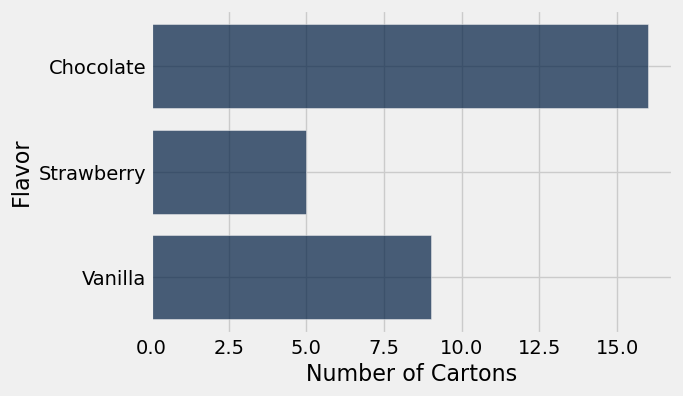

In [3]:
icecream.barh('Flavor', 'Number of Cartons')
plots.show()

`.barh()`는 두 개의 변수가 필요하다. (flavor, number of cartons)

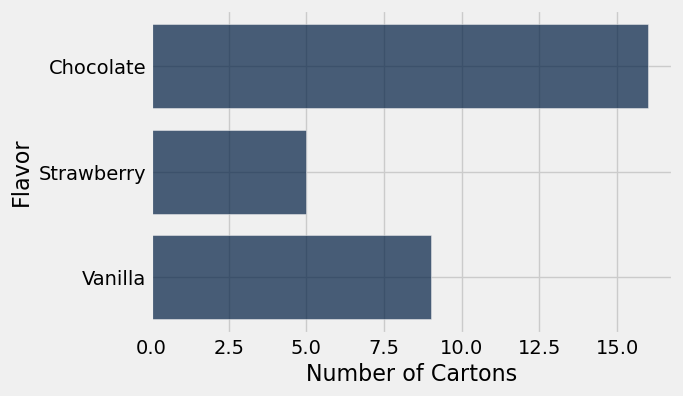

In [4]:
icecream.barh('Flavor')
plots.show()

데이터가 단순하면 `.barh()` 메서드 호출이 훨신 간단하다.

### Design Aspects of Bar Charts (막대그래프 디자인 측면)

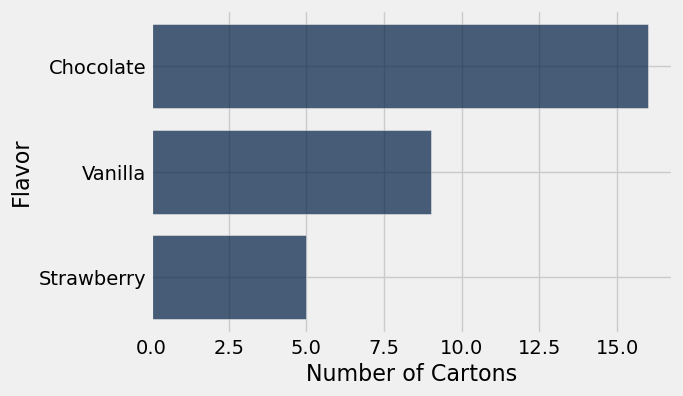

In [5]:
icecream.sort('Number of Cartons', descending=True).barh('Flavor')
plots.show()

좀 더 직관적인 시각화를 위해 각 맛별로 개수를 출력한 후, 개수가 많은 순으로 정렬하여 그림을 그릴 수 있다.

### Grouping Categorical Data (범주형 데이터 그룹핑)

In [6]:
top = Table.read_table(path_data + 'top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


200개의 영화와 스튜디오의 정보가 담긴 데이터셋이다. 우리는 200개의 영화 중 어떤 스튜디오가 가장 많이 등장할 지 알아보자.

In [7]:
studio_distribution = top.select('Title', 'Studio')
studio_distribution

Title,Studio
Gone with the Wind,MGM
Star Wars,Fox
The Sound of Music,Fox
E.T.: The Extra-Terrestrial,Universal
Titanic,Paramount
The Ten Commandments,Paramount
Jaws,Universal
Doctor Zhivago,MGM
The Exorcist,Warner Brothers
Snow White and the Seven Dwarves,Disney


In [8]:
studio_distribution = top.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


테이블 메서드 `.group()`은 범주형 데이터의 개수를 구하여 나타내는 count행을 포함한다. 이는 relabeled를 통해 바꿀수도있다.

In [9]:
sum(studio_distribution.column('count'))

200

총 합은 200개임을 알 수 있다.

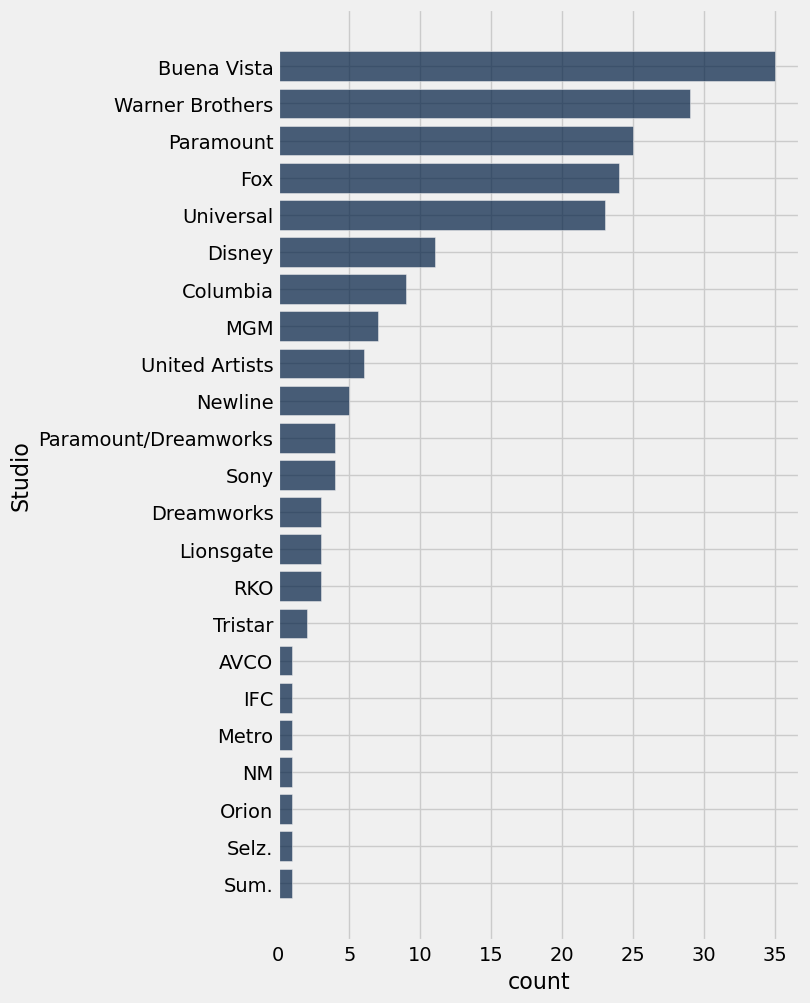

In [10]:
studio_distribution.sort('count', descending=True).barh('Studio')
plots.show()

Buena Vista가 가장 자주 등장함을 알 수 있다.

### Towards Quantitative Variables (정량적 변수)

연도는 수치형 변수지만, 개별 연도를 범주형으로 처리하여 분포를 그릴 수 도 있다. 연도별 개봉한 영화 수를 나타내는 분포를 그려보자.

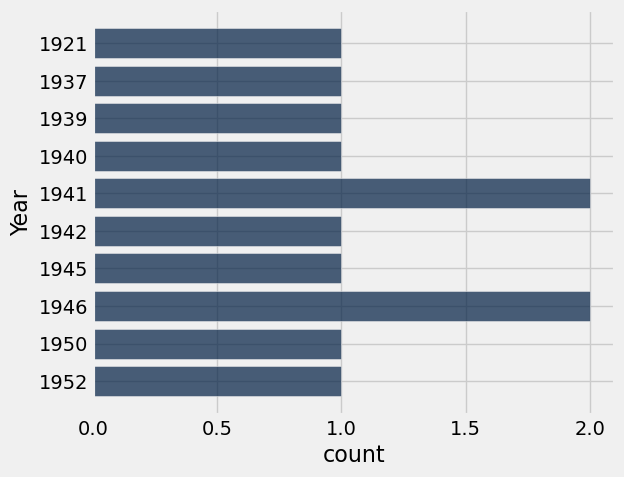

In [11]:
movies_and_years = top.select('Title', 'Year')
movies_and_years = movies_and_years.group('Year').take(np.arange(10))
movies_and_years.barh('Year')
plots.show()

# 7.2. Visualizing Numerical Distributions (수치형 변수의 시각화)

In [12]:
top = Table.read_table(path_data + 'top_movies_2017.csv')
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
Star Wars,Fox,"460,998,007","1,583,483,200",1977
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
Titanic,Paramount,"658,672,302","1,204,368,000",1997
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
Jaws,Universal,"260,000,000","1,138,620,700",1975
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [19]:
millions = top.select('Title').with_column('Adjusted Gross', np.round(top.column('Gross (Adjusted)') / 1e6, 2))
millions

Title,Adjusted Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


## 데이터 비닝

범위를 지정해 해당 범위의 개수를 찾는 것

In [20]:
adj_gross = millions.column('Adjusted Gross')
min(adj_gross), max(adj_gross)

(338.41000000000003, 1796.1800000000001)

In [25]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300, 2001, 100))
bin_counts.show()

bin,Adjusted Gross count
300,68
400,60
500,32
600,15
700,7
800,7
900,3
1000,0
1100,3
1200,3


빈을 지정함으로써 최댓값과 최솟값 사이에 일정 간격 만큼 구간을 나누어 각 구간별 개수를 구한다.

In [23]:
bin_counts = millions.bin('Adjusted Gross')
bin_counts.show()

bin,Adjusted Gross count
338.41,115
484.187,50
629.964,14
775.741,10
921.518,3
1067.3,4
1213.07,2
1358.85,0
1504.63,1
1650.4,1


빈을 지정하지 않으면 최댓값과 최솟값 사이에 동일 너비의 빈을 10개 만든다.

In [26]:
millions.bin('Adjusted Gross', bins=4)

bin,Adjusted Gross count
338.41,177
702.852,15
1067.3,6
1431.74,2
1796.18,0


빈에 일정 수치를 넣으면 4개의 간격, 즉 5개의 빈이 생성된다.

### 히스토그램

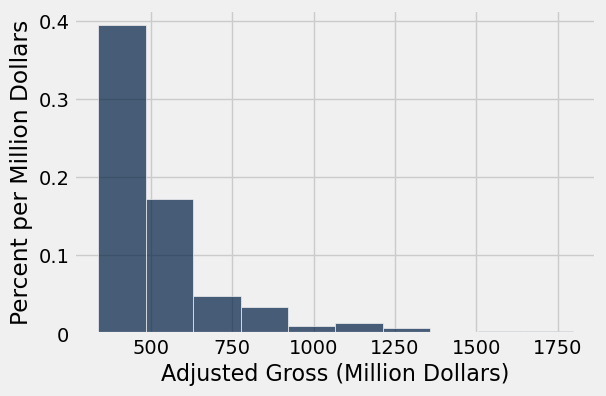

In [ ]:
millions.hist('Adjusted Gross', unit="Million Dollars") # unit : 단위
plots.show()

정량적 변수의 분포를 시각화 한 것. 막대 차트와 비슷해 보이지만 중요한 차이점이 있다.

hist 방법은 열의 값에 대한 히스토그램을 생성한다. 빈은 최솟값 부터 최댓값 사이 10개 빈을 생성한다.

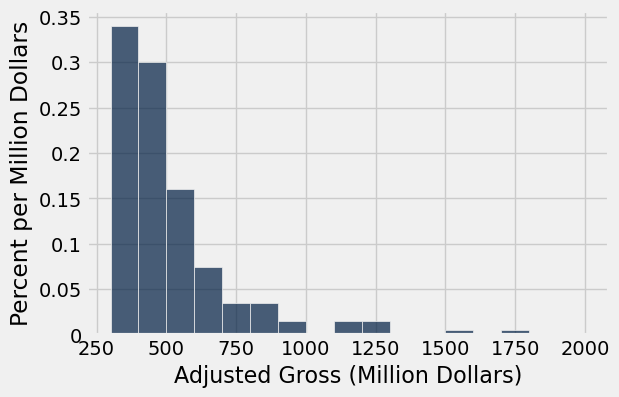

In [33]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")
plots.show()

### The Area Principle (영역 법칙)

In [35]:
bin_counts.show(3)

bin,Adjusted Gross count
300,68
400,60
500,32


300 ~ 399 사이의 값이 총 68개. 34%이다. 

$\frac{68}{200} \cdot 100 = 34\% $

또한 너비는 400 - 300 = 100이다.

따라서 높이는 0.34가 된다. (단위 : percent per millions dollars)

### 단순히 카운트를 표시하지 않는 이유?

숫자나 백분율 대신 세로축에 밀도를 표시하는 주된 이유는 히스토그램을 비교하고 곡선 아래 면적으로 비율을 나타내는 매끄러운 곡선으로 근사할 수 있기 때문이다.

밀도 척도에 히스토그램을 그리면 크기가 다른 데이터 세트를 기반으로 하거나 빈을 선택할 수 있는 히스토그램을 비교할 수 있다. 이러한 경우 빈 개수나 백분율은 직접 비교할 수 없다. 하지만 두 히스토그램을 밀도 척도에 맞추면 면적과 밀도가 비교할 수 있다.

히스토그램에 불평등한 빈이 있는 경우 밀도 척도에 대한 그래프를 그리는 것이 해석 가능성을 위한 필수 조건이다.

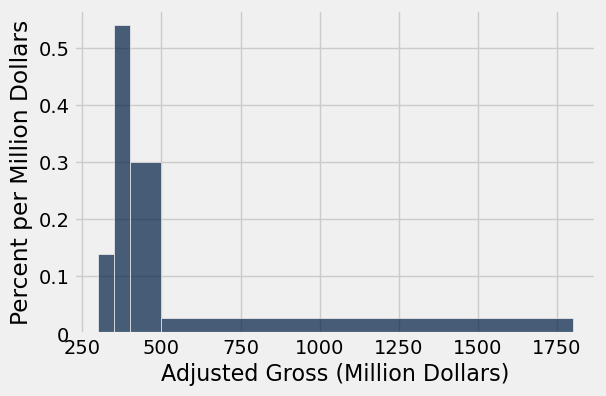

In [38]:
uneven = make_array(300, 350, 400, 500, 1800)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")
plots.show()

In [39]:
millions.bin('Adjusted Gross', bins=uneven)

bin,Adjusted Gross count
300,14
350,54
400,60
500,72
1800,0


300 ~ 349 사이의 값은 다음과 같다.

$\frac{14}{200} \cdot 100 = 7\%$

이 빈의 가로는 50, 너비는 7이므로 높이는 1.4 (percent per million dollars)가 된다.

반면에 500 ~ 1799 사이의 값은 다음과 같다.

$\frac{72}{200} \cdot 100 = 36\%$

하지만 가로의 길이는 1300, 너비는 36이므로 높이는 1.4보다 작은 값이다.

즉, 각 빈에 대해서 개수가 많아도 범위가 상대적으로 넓기 때문에 빈의 밀도가 낮다고 볼 수 있다.

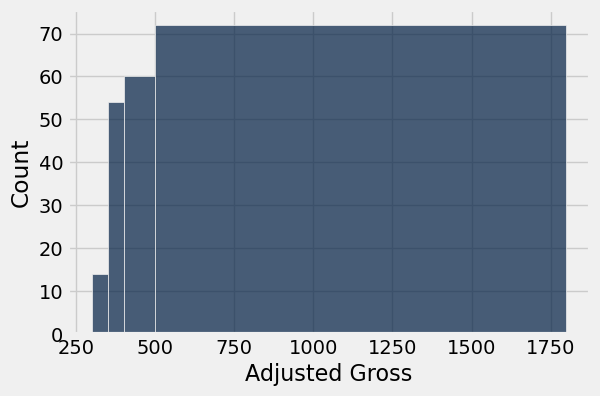

In [40]:
millions.hist('Adjusted Gross', bins=uneven, normed=False)
plots.show()

하지만 normalized를 하면 다음과 같이 그림이 잘못되어진다.

### Flat Tops and the Level of Detail (플랫 탑과 디테일 수준)

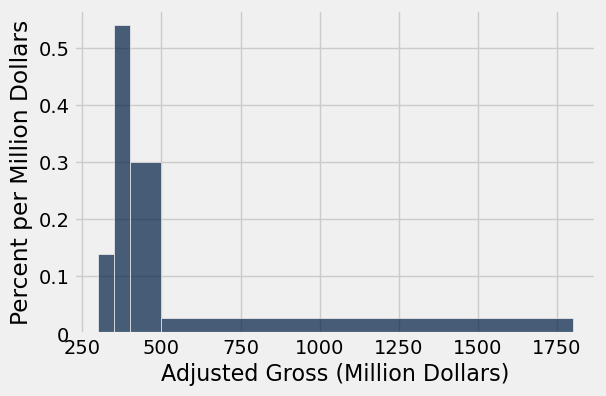

In [43]:
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")
plots.show()

해당 그림에서, 400 ~ 499 사이가 다소 불균등하다는 정보를 숨기고 있다.

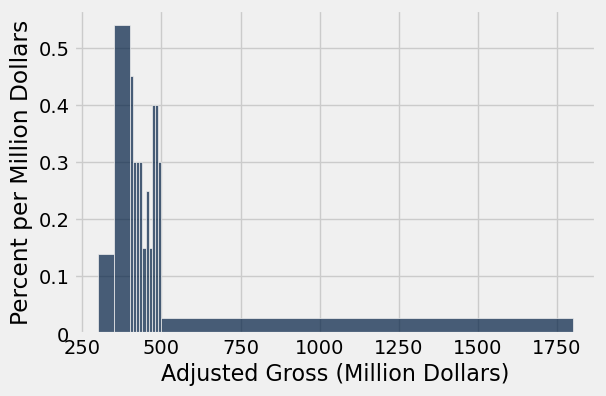

In [44]:
some_tiny_bins = make_array(
    300, 350, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 1800)
millions.hist('Adjusted Gross', bins=some_tiny_bins, unit='Million Dollars')
plots.show()

어떤 바는 0.3보다 크고, 어떤 바는 0.3보다 작다. hist는 세밀한 정보는 버리고 대략적인 근사치만을 제공하기에 분포의 일반적인 모양을 이해하는데는 충분할 수 있다.

### Computing All Heights (모든 높이 계산)

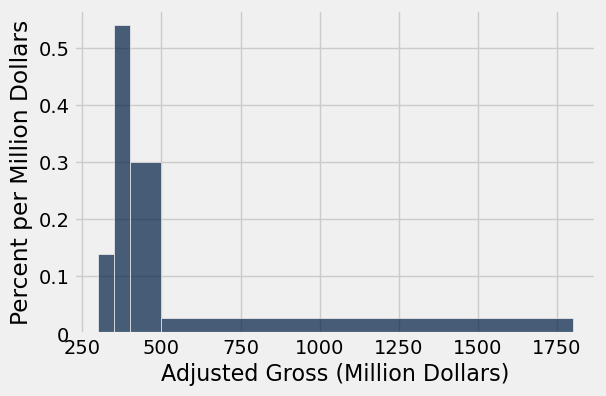

In [47]:
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")
plots.show()

In [48]:
histogram_elements = millions.bin('Adjusted Gross', bins=uneven).relabeled(1, 'count')
histogram_elements

bin,count
300,14
350,54
400,60
500,72
1800,0


In [49]:
total_count = sum(histogram_elements.column('count'))
percents = np.round(100*histogram_elements.column('count')/total_count, 2)
histogram_elements = histogram_elements.with_columns('percent', percents)
histogram_elements

bin,count,percent
300,14,7
350,54,27
400,60,30
500,72,36
1800,0,0


In [50]:
bin_widths = np.diff(histogram_elements.column('bin'))
num_bins = histogram_elements.num_rows - 1    # the number of bins
histogram_elements = histogram_elements.take(
    np.arange(num_bins)).with_columns(
    'width', bin_widths
)
histogram_elements

bin,count,percent,width
300,14,7,50
350,54,27,50
400,60,30,100
500,72,36,1300


In [51]:
heights = np.round(
    histogram_elements.column('percent')/histogram_elements.column('width'),2)
histogram_elements = histogram_elements.with_columns('height', heights)
histogram_elements

bin,count,percent,width,height
300,14,7,50,0.14
350,54,27,50,0.54
400,60,30,100,0.3
500,72,36,1300,0.03


# 7.3 Overlaid Graphs

### Scatter plots

In [52]:
sons_heights = Table.read_table(path_data + 'sons_heights.csv')
sons_heights

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


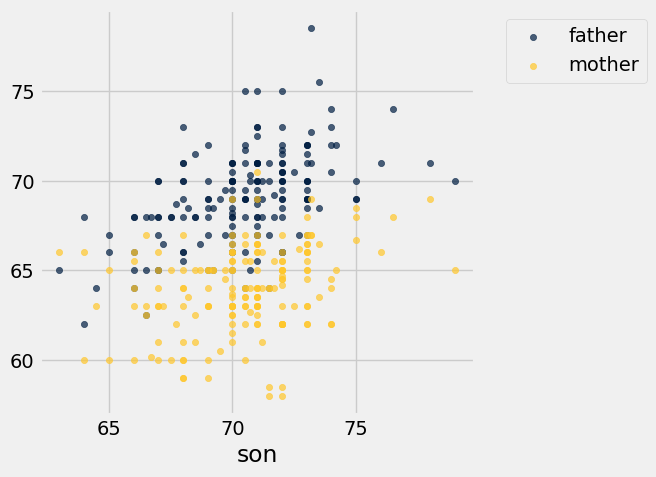

In [55]:
sons_heights.scatter('son')
plots.show()

### Line plots

In [56]:
# Read the full Census table
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'
full_census_table = Table.read_table(data)

# Select columns from the full table and relabel some of them
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')

# Access the rows corresponding to all children, ages 0-18
children = us_pop.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children.show()

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


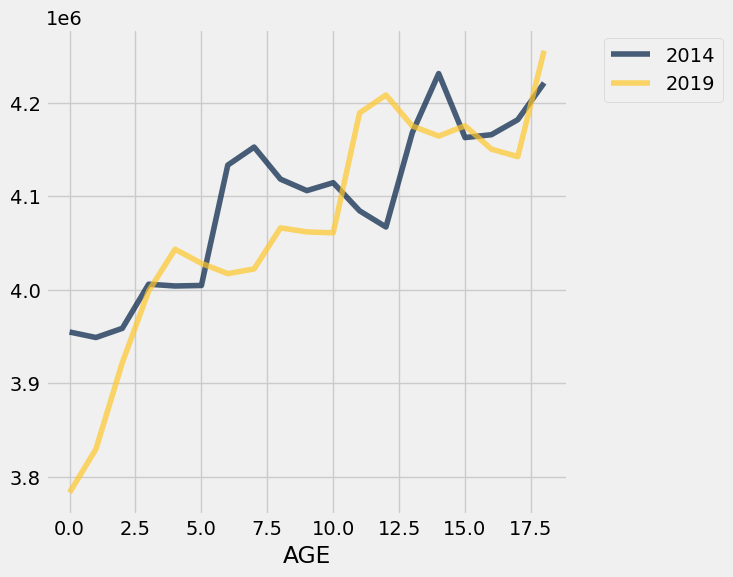

In [57]:
children.plot('AGE')
plots.show()

### Bar Charts

In [58]:
usa_ca = Table.read_table(path_data + 'usa_ca_2019.csv')
usa_ca

Ethnicity/Race,USA All,CA All,USA Children,CA Children
API,5.8,15.1,4.9,11.5
Black,12.2,5.3,13.4,4.9
Hispanic,18.5,39.5,25.6,52.1
White,60.1,36.4,50,25.5
Other,3.4,3.7,6.1,6


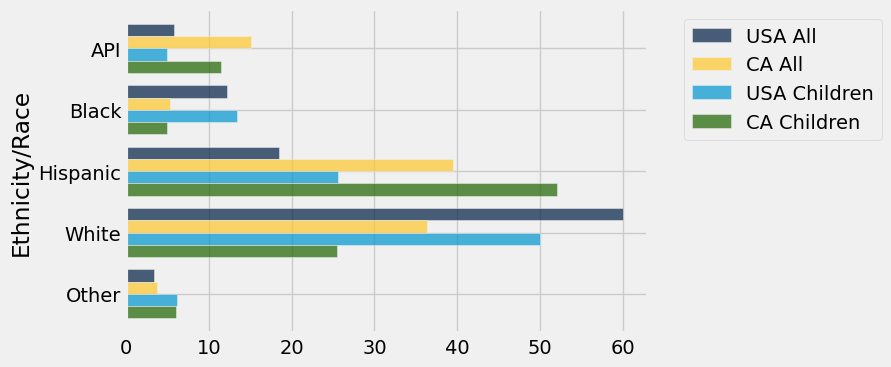

In [62]:
usa_ca.barh('Ethnicity/Race')
plots.show()

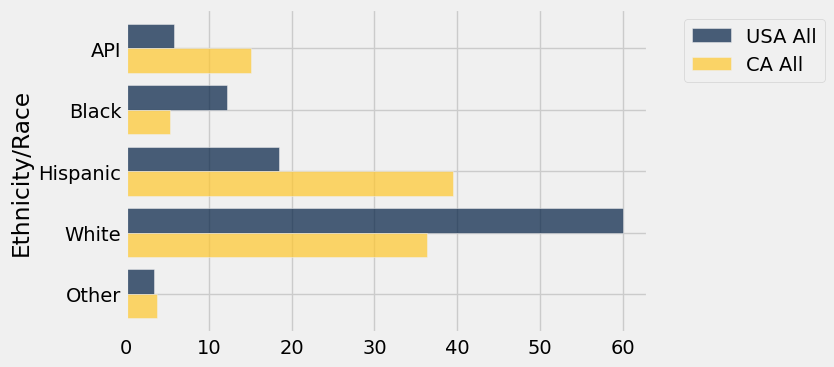

In [65]:
usa_ca.select('Ethnicity/Race', 'USA All', 'CA All').barh('Ethnicity/Race')
plots.show()